In [2]:
import pandas as pd
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score

In [3]:
df=pd.read_csv("goibibo_flights_data.csv")

In [4]:
df['stops'].unique()

array(['non-stop', '1-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n

In [5]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN
3,26-06-2023,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop,NaN,NaN
4,26-06-2023,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop,NaN,NaN


In [6]:
df=df.drop(columns=["Unnamed: 11","Unnamed: 12"])

In [7]:
df["duration"]=np.dot(np.array(df.duration.str.findall('\d+').tolist()).astype(int),[60,1])

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sharm\AppData\Local\Temp\ipykernel_23196\2765109906.py:1: SyntaxWarning: invalid escape sequence '\d'
  df["duration"]=np.dot(np.array(df.duration.str.findall('\d+').tolist()).astype(int),[60,1])


In [8]:
# price column conversion
df['price'] = df['price'].str.replace(',', '').astype(int)

In [9]:
df['flight date'] = pd.to_datetime(df['flight date'])

# Extracting day, month, and year
df['day'] = df['flight date'].dt.day
df['month'] = df['flight date'].dt.month
df['year'] = df['flight date'].dt.year

C:\Users\sharm\AppData\Local\Temp\ipykernel_23196\3639927383.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['flight date'] = pd.to_datetime(df['flight date'])


In [10]:
df=df.drop(columns=["flight date"])

In [11]:
len(df.flight_num.unique())

1569

In [12]:
df=df.drop(columns=["flight_num"])

In [13]:
df['class'].unique()

array(['economy', 'business'], dtype=object)

In [14]:
df.head()

,airline,class,from,dep_time,to,arr_time,duration,price,stops,day,month,year
0,SpiceJet,economy,Delhi,18:55,Mumbai,21:05,130,6013,non-stop,26,6,2023
1,SpiceJet,economy,Delhi,06:20,Mumbai,08:40,140,6013,non-stop,26,6,2023
2,AirAsia,economy,Delhi,04:25,Mumbai,06:35,130,6016,non-stop,26,6,2023
3,Vistara,economy,Delhi,10:20,Mumbai,12:35,135,6015,non-stop,26,6,2023
4,Vistara,economy,Delhi,08:50,Mumbai,11:10,140,6015,non-stop,26,6,2023


In [15]:
df['arr_time'] = df['arr_time'].apply(lambda x:x.split(' ')[0])

In [16]:
df['arr_hour'] = df['arr_time'].str.split(':').str[0]
df['arr_min'] = df['arr_time'].str.split(':').str[1]

In [17]:
df['arr_hour'] = df['arr_hour'].astype(int)
df['arr_min'] = df['arr_min'].astype(int) 

In [18]:
df.drop('arr_time', axis = 1, inplace=True)

In [19]:
df['dep_time'] = df['dep_time'].apply(lambda x:x.split(' ')[0])

In [20]:
df['dep_hour'] = df['dep_time'].str.split(':').str[0]
df['dep_min'] = df['dep_time'].str.split(':').str[1]

In [21]:
df['dep_hour'] = df['dep_hour'].astype(int)
df['dep_min'] = df['dep_min'].astype(int) 

In [22]:
df.drop('dep_time', axis = 1, inplace=True)

In [23]:
df.head()

,airline,class,from,to,duration,price,stops,day,month,year,arr_hour,arr_min,dep_hour,dep_min
0,SpiceJet,economy,Delhi,Mumbai,130,6013,non-stop,26,6,2023,21,5,18,55
1,SpiceJet,economy,Delhi,Mumbai,140,6013,non-stop,26,6,2023,8,40,6,20
2,AirAsia,economy,Delhi,Mumbai,130,6016,non-stop,26,6,2023,6,35,4,25
3,Vistara,economy,Delhi,Mumbai,135,6015,non-stop,26,6,2023,12,35,10,20
4,Vistara,economy,Delhi,Mumbai,140,6015,non-stop,26,6,2023,11,10,8,50


Skewness of Price: 1.0621723087979194


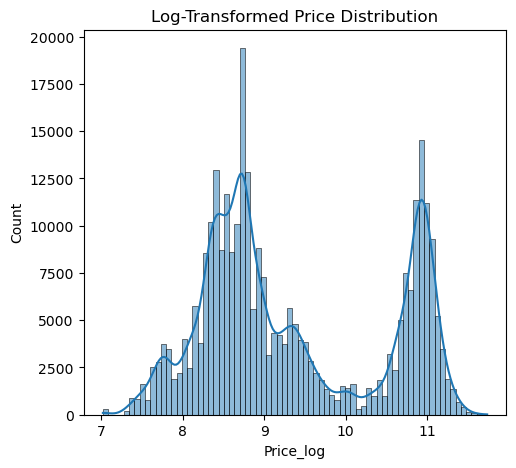

In [24]:
from scipy.stats import skew

# Check skewness
print(f"Skewness of Price: {skew(df['price'])}")

# Apply log transformation if necessary
df['Price_log'] = np.log1p(df['price'])  # log1p is used to avoid log(0) issues

# Visualize the transformed data
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Price_log'], kde=True)
plt.title('Log-Transformed Price Distribution')

plt.show()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   airline    300261 non-null  object 
 1   class      300261 non-null  object 
 2   from       300261 non-null  object 
 3   to         300261 non-null  object 
 4   duration   300261 non-null  int32  
 5   price      300261 non-null  int32  
 6   stops      300261 non-null  object 
 7   day        300261 non-null  int32  
 8   month      300261 non-null  int32  
 9   year       300261 non-null  int32  
 10  arr_hour   300261 non-null  int32  
 11  arr_min    300261 non-null  int32  
 12  dep_hour   300261 non-null  int32  
 13  dep_min    300261 non-null  int32  
 14  Price_log  300261 non-null  float64
dtypes: float64(1), int32(9), object(5)
memory usage: 24.1+ MB


In [26]:
df.stops.unique()

array(['non-stop', '1-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '2+-stop',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t',
       '1-stop\n

In [27]:
df.head()

,airline,class,from,to,duration,price,stops,day,month,year,arr_hour,arr_min,dep_hour,dep_min,Price_log
0,SpiceJet,economy,Delhi,Mumbai,130,6013,non-stop,26,6,2023,21,5,18,55,8.701845
1,SpiceJet,economy,Delhi,Mumbai,140,6013,non-stop,26,6,2023,8,40,6,20,8.701845
2,AirAsia,economy,Delhi,Mumbai,130,6016,non-stop,26,6,2023,6,35,4,25,8.702344
3,Vistara,economy,Delhi,Mumbai,135,6015,non-stop,26,6,2023,12,35,10,20,8.702178
4,Vistara,economy,Delhi,Mumbai,140,6015,non-stop,26,6,2023,11,10,8,50,8.702178


In [28]:
encoder = OneHotEncoder()
encoder.fit_transform(df[['airline','class','from','to','stops']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
encoded_df=pd.DataFrame(encoder.fit_transform(df[['airline','class','from','to']]).toarray(),columns=encoder.get_feature_names_out())
encoded_df

,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_StarAir,airline_Trujet,airline_Vistara,class_business,class_economy,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
df = pd.concat([df, encoded_df], axis=1)
df.head()

,airline,class,from,to,duration,price,stops,day,month,year,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,SpiceJet,economy,Delhi,Mumbai,130,6013,non-stop,26,6,2023,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,SpiceJet,economy,Delhi,Mumbai,140,6013,non-stop,26,6,2023,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,AirAsia,economy,Delhi,Mumbai,130,6016,non-stop,26,6,2023,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Vistara,economy,Delhi,Mumbai,135,6015,non-stop,26,6,2023,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Vistara,economy,Delhi,Mumbai,140,6015,non-stop,26,6,2023,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
df.drop(columns=['airline','class','from','to'], axis=1 , inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   duration           300261 non-null  int32  
 1   price              300261 non-null  int32  
 2   stops              300261 non-null  object 
 3   day                300261 non-null  int32  
 4   month              300261 non-null  int32  
 5   year               300261 non-null  int32  
 6   arr_hour           300261 non-null  int32  
 7   arr_min            300261 non-null  int32  
 8   dep_hour           300261 non-null  int32  
 9   dep_min            300261 non-null  int32  
 10  Price_log          300261 non-null  float64
 11  airline_Air India  300261 non-null  float64
 12  airline_AirAsia    300261 non-null  float64
 13  airline_GO FIRST   300261 non-null  float64
 14  airline_Indigo     300261 non-null  float64
 15  airline_SpiceJet   300261 non-null  float64
 16  ai

In [33]:
df.head()

,duration,price,stops,day,month,year,arr_hour,arr_min,dep_hour,dep_min,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,130,6013,non-stop,26,6,2023,21,5,18,55,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,140,6013,non-stop,26,6,2023,8,40,6,20,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,130,6016,non-stop,26,6,2023,6,35,4,25,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,135,6015,non-stop,26,6,2023,12,35,10,20,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,140,6015,non-stop,26,6,2023,11,10,8,50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


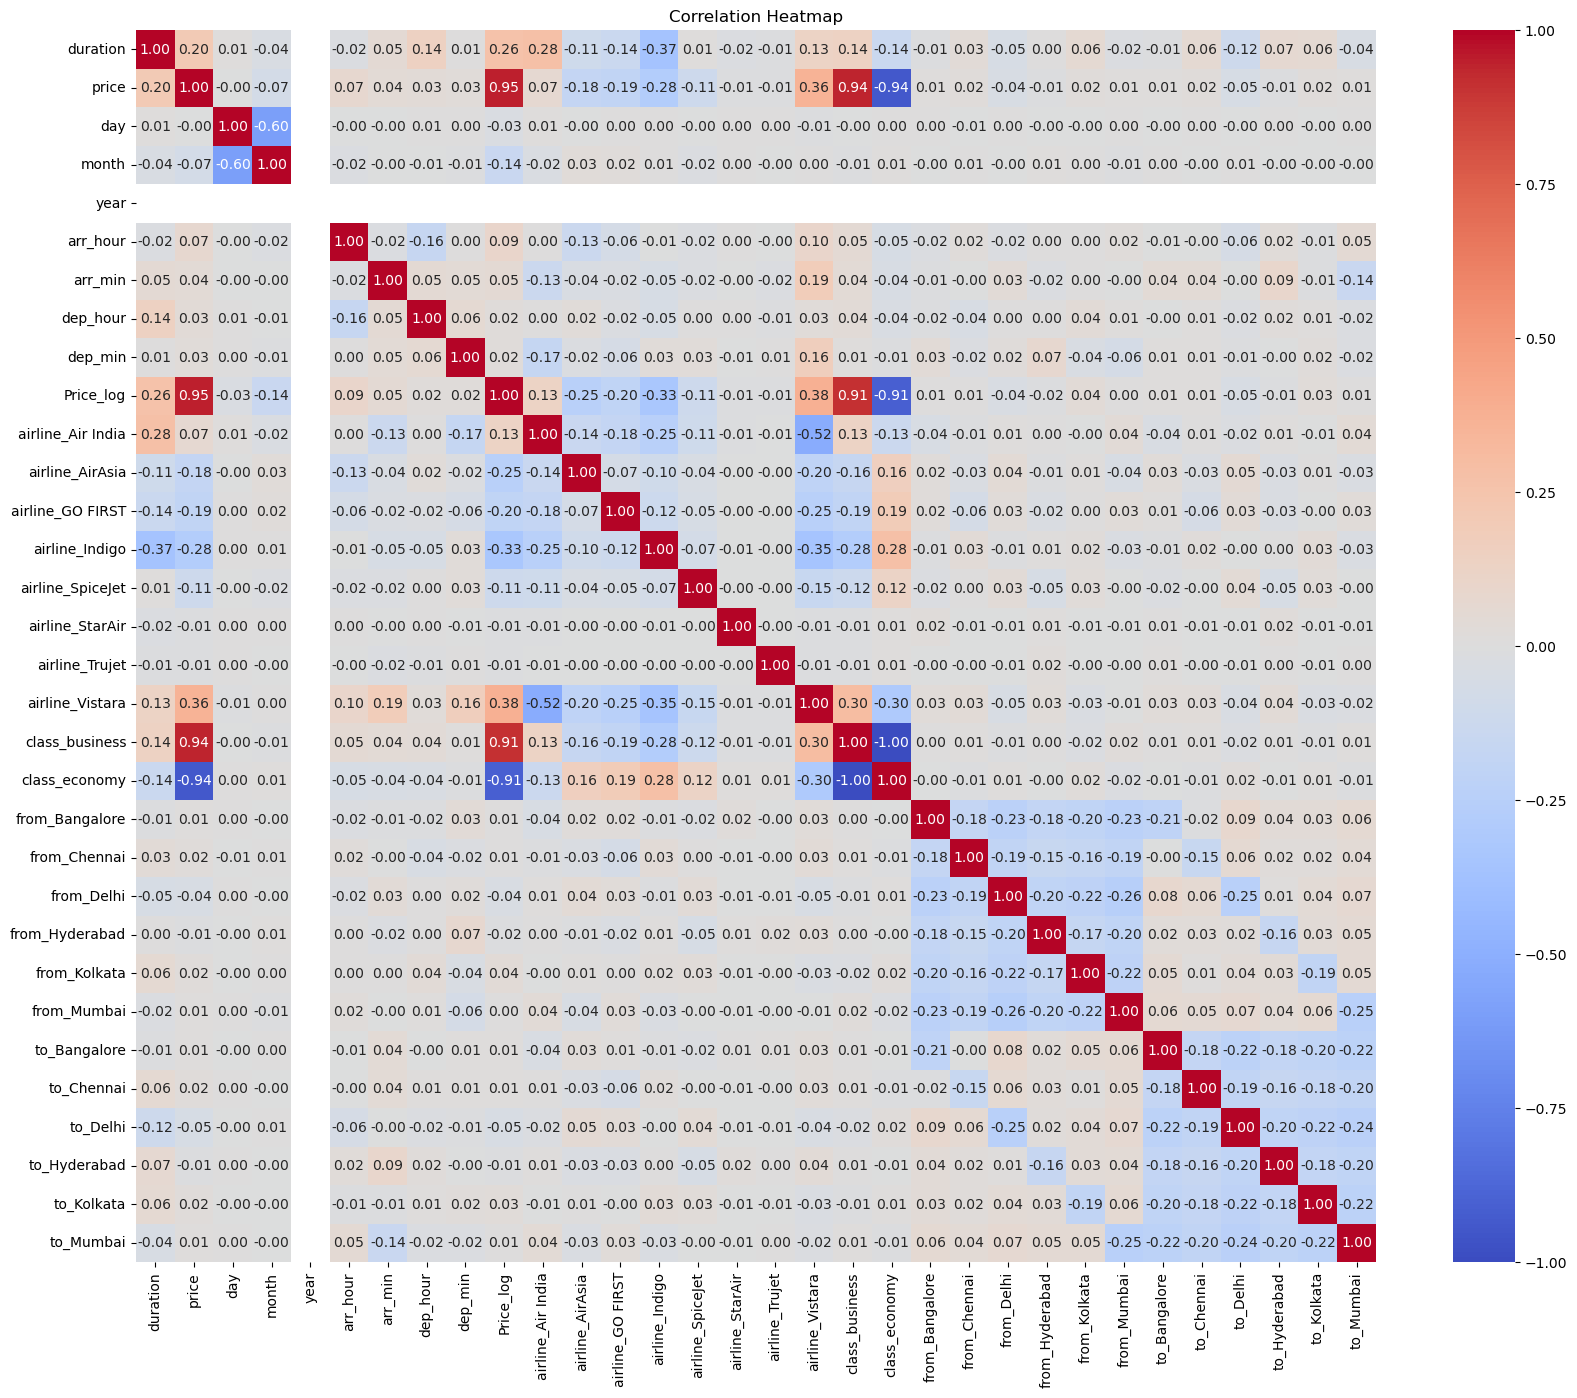

In [34]:
plt.figure(figsize=(20,16))
sns.heatmap(df.drop(columns=["stops"]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# df[]

In [36]:
x = df.drop(columns=['Price_log','stops','price'])  # Features
y = df['Price_log']                 # Target

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

In [38]:
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [39]:
from sklearn.metrics import accuracy_score,recall_score
y_pred = model.predict(x_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

MAE: 0.06036993832651124
MSE: 0.01565982516953919
R2 Score: 0.9873874373663167


In [40]:
import pickle
with open("flight_price_model.pkl", "wb") as file:
    pickle.dump(model, file)
    

In [41]:
# x_train.columns